In [2]:
%%capture
import sys

# List of libraries to be installed
libraries = ['numpy', 'matplotlib', 'torch', 'torchvision', 'scikit-image', 'wandb']

# Iterating through the list and installing each library
for library in libraries:
    !{sys.executable} -m pip install {library}

# Now you can import the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
import wandb as wb
from skimage.io import imread

- def GPU(data): This line defines a function named GPU that takes an argument data. The purpose of this function is to convert the input data into a PyTorch tensor that can be processed on a GPU.

    - return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')): This line creates a PyTorch tensor from the input data and returns it. Several parameters are set during this tensor creation:
        - Tensors are a generalization of vectors and matrices and are a fundamental data structure in machine learning. They're used for storing the parameters of models, the data, and much more.
                
        - requires_grad=True: This tells PyTorch to keep track of all the operations on this tensor, so that it can automatically compute gradients for optimizing a model.
                - In the context of machine learning, gradients are vectors containing all the partial derivatives of a function. They're crucial for optimization algorithms like stochastic gradient descent (SGD) that are used to minimize a loss function.
        - requires_grad=False: Unlike the GPU function, this tensor does not require gradients to be computed. This is usually the case for input data rather than model parameters.
                - The absence of the gradient requirement suggests that this tensor is not involved in the learning (or optimization) phase. It is likely intended for input data or other non-trainable parameters.
                
        - dtype=torch.float: This sets the data type of the tensor to be floating-point numbers.
                - Floating-point numbers are used in machine learning to allow for fractional values, which are often needed for accurate calculations.
    
        - device=torch.device('cuda'): This sets the tensor to be on the GPU ('cuda' is the name commonly used for Nvidia GPUs).
                - Mathematical operations on tensors can be parallelized on a GPU, making the computations faster. This is particularly beneficial for large-scale data and complex models.

In [3]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float)

- def plot(x):: This defines a function named plot that takes an argument x.

    - if type(x) == torch.Tensor :: This line checks if the type of the variable x is a PyTorch tensor.

        - x = x.cpu().detach().numpy(): If x is a PyTorch tensor, this line converts it to a NumPy array. Let's break down each part:

        - x.cpu(): Moves the tensor to the CPU if it's on another device like a GPU.
                
        - x.detach(): Detaches the tensor from the computation graph. This is necessary if requires_grad=True for the tensor, as it ensures that further operations on this new tensor won't affect gradient computation.
                
        - x.numpy(): Converts the tensor to a NumPy array.
    
    - fig, ax = plt.subplots(): This line creates a new matplotlib figure (fig) and axes (ax) for plotting.

    - im = ax.imshow(x, cmap = 'gray'): This line displays the data (x) as an image. The cmap='gray' part sets the colormap to grayscale.
        - The data x being plotted here could be an image or any 2D array. Mathematically, you're visualizing a function f(x,y) where f gives the intensity at coordinates (x,y).

    - ax.axis('off'): This turns off the axis, making the plot cleaner and focused solely on the image.

    - fig.set_size_inches(7, 7): This sets the size of the figure to 7x7 inches.

    - plt.show(): Finally, this line actually displays the plot.

In [4]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

- x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0): This line uses NumPy's pad function to add padding to the array x. The pad_width argument specifies how much padding to add along each dimension. In this case, no padding is added to the first dimension (0, 0), and a single unit of padding is added to the second and third dimensions (1, 1).

In [5]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

- datasets.MNIST('./data', train=True, download=True): This line uses the datasets module (likely from PyTorch's torchvision package) to download and load the MNIST dataset for training. The dataset will be stored in a directory called ./data.

- train=True: Specifies that the training dataset should be loaded.

- download=True: Indicates that the dataset should be downloaded if it's not already present in the specified directory.

- train_set: This variable will hold the training data.

The second line is almost identical but uses train=False to indicate that the test dataset should be loaded into test_set.

In [6]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

1.3%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw


Features and Labels: In machine learning, we often denote the input data as X and the labels as Y. Here, X would be a 3D array with shape (num_samples, 28, 28), where each 28x28 matrix represents a grayscale image of a handwritten digit. Y would be a 1D array with num_samples elements, each being an integer label from 0 to 9.

Training and Test Sets: The variables X and Y contain the features and labels for the training set, while X_test and Y_test contain those for the test set. These are essential for training the model and evaluating its performance.

- train_set.data.numpy(): This line takes the data from train_set, which is in PyTorch tensor format, and converts it to a NumPy array. The .data attribute fetches the features (in this case, images), and .numpy() converts them to NumPy arrays.

- train_set.targets.numpy(): Similarly, this line fetches the target labels from train_set and converts them to a NumPy array.

- X and Y: These variables hold the training data and labels, respectively, in NumPy array format.

- X_test and Y_test: These variables hold the test data and labels, respectively, also in NumPy array format.

- X[:,None,:,:]: This slice adds a new dimension to the array 
X. The original shape of X is likely (num_samples, 28, 28). After this operation, it will become (num_samples, 1, 28, 28).
    - Adding a Dimension: Adding an extra dimension is often done to indicate that the images have only one color channel (grayscale). This format is typically expected by convolutional neural network (CNN) libraries.
        
- /255: This operation divides each element in X and X_test by 255. This is a standard way to normalize image data to the range [0, 1].
    - Normalization: Dividing by 255 scales all pixel values to the range [0, 1]. Normalization is a common preprocessing step in machine learning to make sure that all features have the same scale. This is particularly important for gradient-based optimization algorithms (like the backpropagation algorithm used for training neural networks) because it can significantly speed up the convergence.

In [7]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [8]:
X.shape

(60000, 1, 28, 28)

In [9]:
x = X[3,0,:,:]

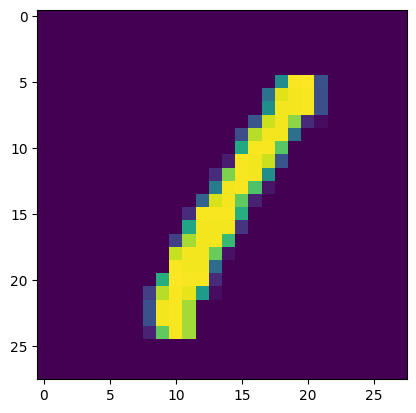

In [10]:
plt.imshow(x)

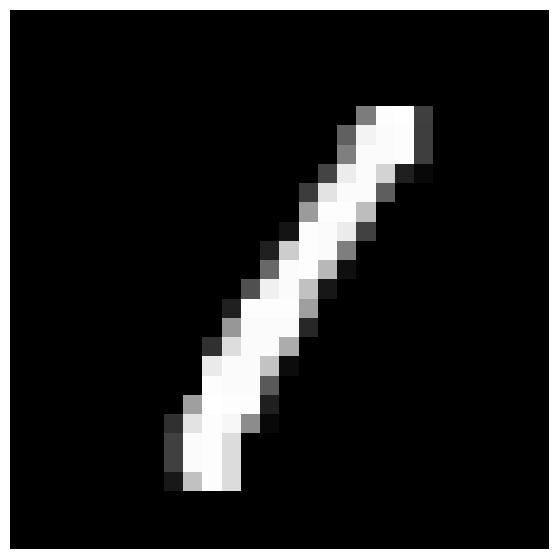

In [11]:
plot(x)

In [12]:
x.shape

(28, 28)

In [13]:
x.shape[0]

28

In [14]:
x.shape[1]

28

x = x.reshape(x.shape[0]*x.shape[1],1): Reshapes x into a column vector.
    - Reshaping x from a 28x28 matrix to a column vector is similar to "flattening" the matrix into a single column, which is a common operation in machine learning for feeding into certain types of layers like fully connected layers.

In [15]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [16]:
x.shape

(784, 1)

In [17]:
x = x.reshape(28,28)

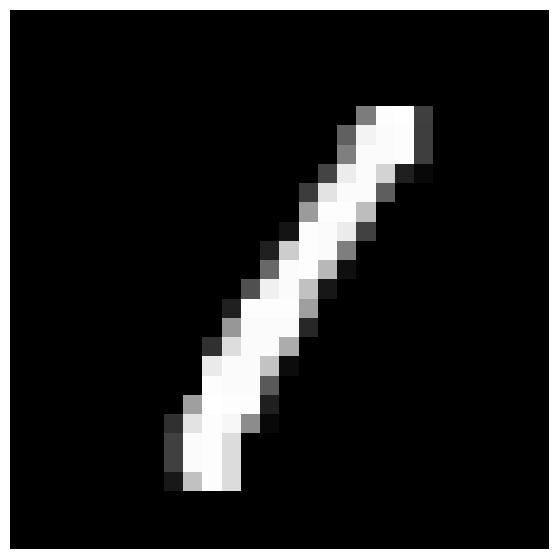

In [18]:
plot(x)

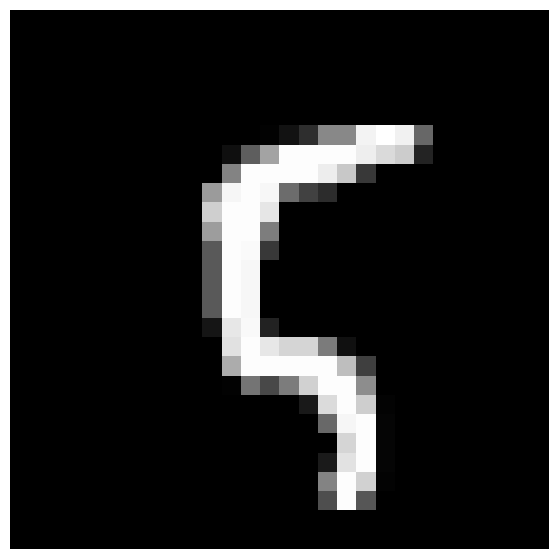

In [19]:
plot(X[100,0,:,:])

In [20]:
Y[120]

2

In [21]:
X[0:25,0,:,:].shape

(25, 28, 28)

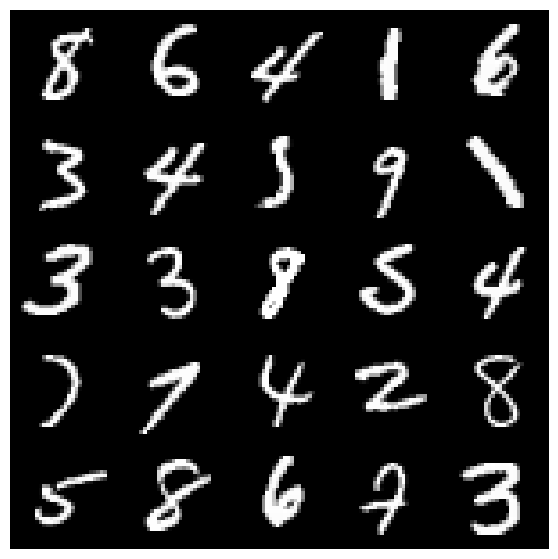

In [22]:
montage_plot(X[125:150,0,:,:])

In [23]:
X.shape[1]

1

In [24]:
X_test.shape

(10000, 1, 28, 28)

In [25]:
X.shape[0]

60000

In [26]:
X_test.shape[0]

10000

- X = X.reshape(X.shape[0],784): Reshapes X from a 4D array to a 2D array where each row represents a flattened image. 

- X_test = X_test.reshape(X_test.shape[0],784): Similar to the first line, this reshapes test X_test.

    - .reshape(): This NumPy method changes the shape of an array without altering its data.
    - X.shape[0]: This is the number of samples in X, and it becomes the number of rows in the reshaped array.
    - 784: This is the product of 28×28, the dimensions of each image. Each image is flattened into a 1D array of size 784.

In [27]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [28]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

- plt.plot(X[100], '.'): This line uses Matplotlib's plot function to create a scatter plot of the 101st image in the array X. The '.' argument specifies that the data points should be represented as dots.
    - Scatter Plot: In this context, the scatter plot provides a way to visualize the distribution of pixel intensities in the image. Each point on the plot corresponds to a pixel in the flattened image. The x-coordinate represents the pixel's position in the flattened array, and the y-coordinate represents the pixel's intensity (which has been normalized to the range [0,1]).
    - Data Representation: Mathematically, this is an alternative way to visualize the function f(x), where f(x) represents the intensity of the pixel at the x-th position in the flattened image.

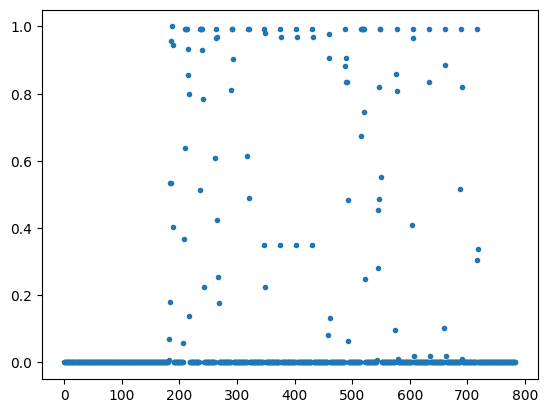

In [29]:
plt.plot(X[100],'.')

In [30]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [31]:
X.shape

torch.Size([60000, 784])

- X.T: This syntax is used to obtain the transpose of a NumPy array or a PyTorch tensor. The .T attribute flips the dimensions of the array.
    - Matrix Transpose: In mathematics, the transpose of a matrix A is another matrix A^T created by flipping A over its diagonal. In terms of the array X, if X initially has a shape (a,b), after this operation, it will have a shape (b,a).
    - Dimension Switch: This operation essentially switches the roles of rows and columns. If you're dealing with data where each row is a sample and each column is a feature, transposing it would make each column a sample and each row a feature.
        
    Transposing data like this is often a necessary preprocessing step depending on the algorithm you're using. Some machine learning algorithms expect data in a specific shape, and transposing the matrix is a way to meet those requirements.
        
- X = X.T: The transposed array replaces the original X.

In [32]:
X = X.T

In [33]:
X.shape

torch.Size([784, 60000])

-  X[:,0:64]: This syntax is used to slice the array X. Specifically, it selects all rows (:) and the first 64 columns (0:64) from X.
- x = X[:,0:64]: The resulting slice is stored in a new variable x.

Feature Selection: This is essentially a form of feature selection where you're choosing to keep only the first 64 features (columns) from the original dataset. Feature selection is often used in machine learning to simplify models, improve performance, and reduce overfitting.

In [34]:
x = X[:,0:64]

In [35]:
x.shape

torch.Size([784, 64])

In [36]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.])

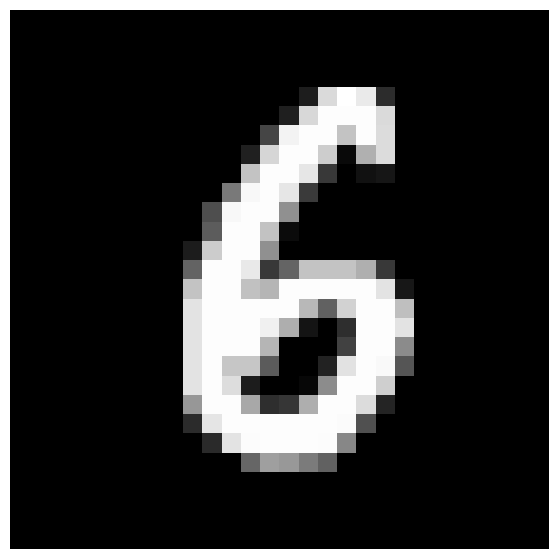

In [37]:
plot(x[:,62].reshape(28,28))

np.random.rand(10,784): This generates a 2D NumPy array with random numbers uniformly sampled from the interval [0,1]. The shape of this array is (10,784).

M appears to serve as a transformation matrix that is applied to the data x. Specifically, the matrix 
M is multiplied by x to produce a new matrix y. This operation is likely simulating a simplified linear transformation, a common operation in machine learning models like neural networks.



In [121]:
M = GPU(np.random.rand(10,784))

In [122]:
M

tensor([[0.9538, 0.3940, 0.1195,  ..., 0.2801, 0.7849, 0.2073],
        [0.7433, 0.9259, 0.8933,  ..., 0.4766, 0.0409, 0.3027],
        [0.1837, 0.6124, 0.5114,  ..., 0.4333, 0.8430, 0.9586],
        ...,
        [0.0695, 0.8739, 0.9314,  ..., 0.3598, 0.7041, 0.1546],
        [0.8527, 0.1805, 0.5984,  ..., 0.6789, 0.8831, 0.4300],
        [0.2445, 0.0152, 0.9830,  ..., 0.6376, 0.6229, 0.3599]],
       requires_grad=True)

check to ensure that M and x have the expected shapes before they are used in subsequent operations. Given that M is a 10x784 matrix and x is derived from X with dimensions reduced to (a,64), checking the shapes ensures that they can be legally multiplied or manipulated together.



In [125]:
M.shape,x.shape

(torch.Size([10, 784]), torch.Size([784, 64]))

M@x: This is Python's syntax for matrix multiplication between M and x. The @ operator performs the dot product between the two matrices.

- M is a 10x784 matrix.
- x is a n×784 matrix (where n is the number of samples).

When M and x are multiplied: y=M×x

Each row in M (which has 784 elements) will be dot-multiplied with each column in 
x (also 784 elements). This operation will produce a single scalar value. Given that M has 10 rows, the output, y, will have 10 such scalar values for each column in x.

The final shape of y will be 10×n, as each of the n columns in x will produce a 10-dimensional column in y.

In machine learning, this kind of operation is commonplace. It serves as a basic building block for more complex operations, such as those in neural networks.

- Feature Transformation: Each row in M can be considered as a set of weights for a particular "feature" that you're trying to extract or emphasize from the original data x.

- Dimensionality Reduction: In this specific case, y is a compressed or transformed representation of 
x. It's like you're reducing the 784-dimensional data points in x to 10 dimensions in y.

- Model's Prediction: Here, y serves as a simple model's prediction or output, which you can then compare to the actual labels Y to calculate some kind of score or loss.

In [126]:
y = M@x

In [127]:
y

tensor([[49.4752, 57.9035, 35.5454, 31.2749, 41.2054, 54.4487, 34.1481, 68.8076,
         21.1978, 42.3134, 50.2566, 27.6671, 65.4127, 56.4158, 23.4836, 46.2838,
         43.4622, 49.3615, 22.1630, 30.3793, 62.0279, 65.4827, 29.0555, 30.9461,
         38.4485, 78.1539, 25.6428, 87.1335, 79.0350, 30.0128, 47.6970, 63.5981,
         32.8203, 39.2257, 64.3929, 31.6318, 56.8091, 65.3808, 37.6747, 49.0016,
         25.5167, 51.4846, 22.6945, 31.6164, 30.9789, 42.7383, 38.9902, 41.5427,
         31.0172, 59.9164, 33.3048, 85.8501, 49.3819, 29.9587, 43.8978, 61.2325,
         75.8564, 35.4107, 61.4602, 30.4914, 57.0527, 33.2199, 53.1169, 83.9151],
        [53.6510, 60.7355, 35.9694, 35.0977, 43.3885, 55.4868, 33.7634, 71.7945,
         20.7378, 39.4558, 54.6921, 28.1463, 66.5842, 52.0859, 21.0174, 49.6184,
         45.7163, 53.5557, 26.3188, 32.9288, 63.2940, 69.5986, 28.4169, 34.1743,
         42.1233, 78.1143, 24.8521, 92.2365, 79.8321, 29.5075, 47.6906, 64.7356,
         33.3266, 40.2514, 

In [ ]:
y.shape

torch.Size([10, 64])

torch.max(y,0): This PyTorch function finds the maximum value along the specified axis (in this case, the zeroth axis, which corresponds to columns).

- Dimension Reduction: This operation effectively reduces the dimension of y from 10×n to 1×n if it's storing both the max values and their indices. It summarizes each column in y with a single maximum value.

- In the Context of ML: In machine learning, especially in classification tasks, taking the maximum value across certain dimensions is common. It's often used in operations like softmax, where you want to identify the most probable class.

In [ ]:
torch.max(y,0)

torch.return_types.max(
values=tensor([57.9111, 68.1139, 41.5454, 38.0118, 49.5515, 61.7173, 36.7544, 76.2139,
        24.8282, 47.5695, 61.1844, 33.1717, 75.3345, 58.9802, 24.8097, 53.9463,
        50.8648, 58.6303, 29.2499, 38.7614, 73.8350, 75.4458, 34.1948, 36.4473,
        47.0416, 87.9732, 27.7992, 98.5799, 88.4018, 30.9793, 54.5321, 73.3499,
        36.9700, 45.7032, 78.6101, 33.5515, 65.9234, 82.4778, 47.7008, 54.9644,
        29.8478, 59.1570, 26.3873, 37.0484, 38.3322, 50.1884, 48.2924, 47.5448,
        37.0489, 71.3254, 42.1914, 94.7634, 60.9659, 37.0503, 48.8766, 67.2230,
        88.4355, 42.7995, 71.9903, 39.1336, 66.1836, 38.1584, 64.3073, 96.1938],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([4, 2, 0, 7, 3, 7, 0, 7, 0, 7, 2, 7, 7, 3, 0, 2, 5, 7, 2, 7, 7, 2, 7, 7,
        2, 4, 7, 7, 2, 0, 2, 7, 5, 7, 2, 0, 2, 2, 2, 2, 0, 2, 0, 7, 7, 2, 7, 4,
        2, 4, 2, 2, 2, 7, 0, 3, 3, 2, 7, 7, 3, 7, 7, 2], device='cuda:0'))

torch.argmax(y,0): This PyTorch function finds the indices of the maximum values along the specified axis—in this case, the zeroth axis, which corresponds to columns.y = torch.argmax(y,0): The result of this operation replaces the original y.

In machine learning, especially in classification tasks, identifying the index of the maximum value is a common way to determine the most probable class label. Given that y was the output of a matrix multiplication with M, this operation could be interpreting y as a set of "scores" for different classes. The index of the maximum score in each column would then be the predicted class label.

In [ ]:
y = torch.argmax(y,0)

In [ ]:
y

tensor([4, 2, 0, 7, 3, 7, 0, 7, 0, 7, 2, 7, 7, 3, 0, 2, 5, 7, 2, 7, 7, 2, 7, 7,
        2, 4, 7, 7, 2, 0, 2, 7, 5, 7, 2, 0, 2, 2, 2, 2, 0, 2, 0, 7, 7, 2, 7, 4,
        2, 4, 2, 2, 2, 7, 0, 3, 3, 2, 7, 7, 3, 7, 7, 2], device='cuda:0')

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [ ]:
y == Y[0:64]

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False], device='cuda:0')

y == Y[0:64]: This operation checks for element-wise equality between y and the first 64 elements of Y. It will return a boolean tensor where each element indicates whether the corresponding elements in y and Y[0:64] are equal.

In [ ]:
torch.sum((y == Y[0:64]))

tensor(1, device='cuda:0')

torch.sum((y == Y[0:64]))/64: This line takes the sum of the boolean values (from the previous comparison of y and Y[0:64]) and divides it by 64. This effectively calculates the proportion of correct predictions.

In [ ]:
torch.sum((y == Y[0:64]))/64

tensor(0.0156, device='cuda:0')

In [128]:
x.shape

torch.Size([784, 64])

In [129]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0625)

In [130]:
z = np.random.rand(10,784)

In [131]:
z.shape

(10, 784)

In [132]:
z.shape[0],z.shape[1]

(10, 784)

count = z.shape[0]*z.shape[1]: This line calculates the total number of elements in z by multiplying its number of rows (z.shape[0]) and columns (z.shape[1]).

In [133]:
count = z.shape[0]*z.shape[1]

z = z.reshape(count,): This line reshapes z into a one-dimensional array with count number of elements.

converts z from a 2D matrix into a 1D vector. This is a common operation in machine learning, especially when you need to pass data through fully connected layers.


In [136]:
z = z.reshape(count,)

In [137]:
z.shape

(7840,)

In [138]:
z = np.random.rand(10,784)

In [139]:
z.shape

(10, 784)

z.flatten(): In NumPy, the flatten() method returns a copy of the array collapsed into one dimension. The multi-dimensional array z will be converted into a 1D array.

- Difference from reshape: Unlike reshape, which returns a view whenever possible and can operate in-place, flatten returns a copy of the data.

In [140]:
z = z.flatten()

In [141]:
z.shape

(7840,)

In [142]:
z = np.random.rand(1000,78)

z.reshape(-1): In NumPy, the reshape() method is used to change the shape of an array. The argument -1 means "unspecified": the value is inferred from the length of the array. Essentially, this reshapes z into a 1D array.

- In-Place vs Copy: Unlike flatten(), which returns a new array, using reshape in this way modifies the existing array without making a copy. This could be more memory-efficient.

- Flexibility: The -1 argument provides flexibility. If the array z changes size, this line will still correctly reshape it into a 1D array.

In [143]:
z = z.reshape(-1)

In [144]:
z.shape

(78000,)

In [145]:
z

array([0.39062565, 0.33284213, 0.50484793, ..., 0.57384184, 0.53587864,
       0.74175812])

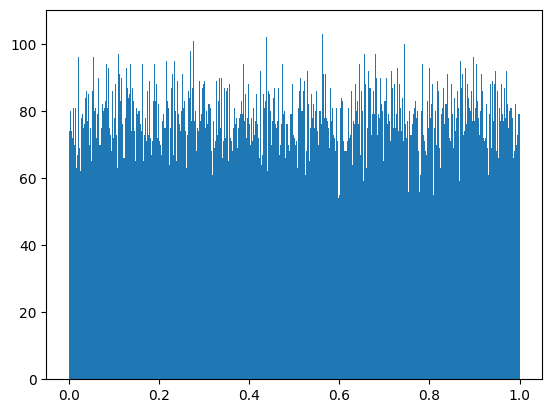

In [146]:
plt.hist(z,1000);

1000*np.random.rand(10000) + 100: This line generates an array of 10,000 random floats, multiplies them by 1000, and then adds 100 to each. This is done using NumPy's np.random.rand() function.

z = 1000*np.random.rand(10000) + 100: The generated array is stored in the variable z.

In [147]:
z = 1000*np.random.rand(10000) + 100

In [148]:
z

array([ 978.89345612,  438.35161137, 1062.19703193, ...,  724.59784881,
        728.79854768,  932.36363988])

In [149]:
np.max(z)

1099.9736462909223

In [150]:
z =z.astype(int)

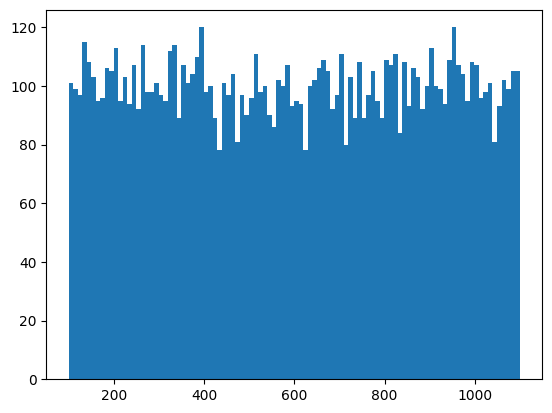

In [151]:
plt.hist(z,100);

In [152]:
z

array([ 978,  438, 1062, ...,  724,  728,  932])

In [165]:
z = 10*np.random.randn(10000) - 10

In [166]:
z = z.flatten()

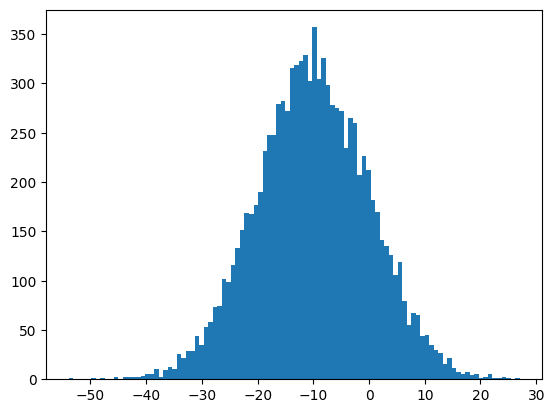

In [167]:
plt.hist(z,100);

z = np.random.randn(10,10): This line generates a 10x10 matrix z with random values drawn from a standard normal distribution using NumPy's np.random.randn() function.

plt.imshow(z): This line uses Matplotlib's imshow function to display the matrix z as an image.

plt.colorbar(): This line adds a color bar to the image plot, which helps in interpreting the pixel values.

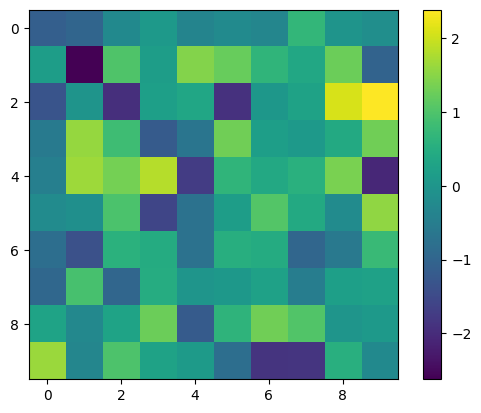

In [ ]:
z = np.random.randn(10,10)
plt.imshow(z)
plt.colorbar()

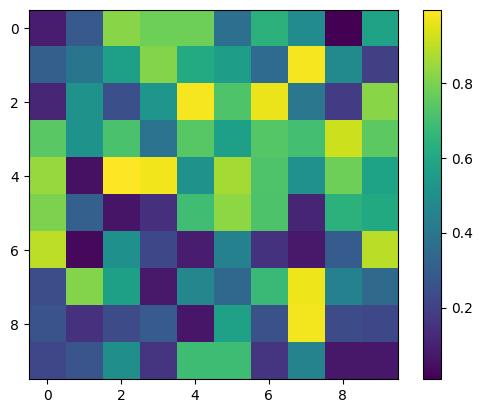

In [ ]:
z = np.random.rand(10,10)
plt.imshow(z)
plt.colorbar()

M_new = GPU(np.random.rand(10,784)): A new transformation matrix M_new of shape 10×784 is generated with random values and then moved to the GPU.

y = M_new@x: Matrix multiplication is performed between M new_x.

y = torch.argmax(y,0): The maximum value along each column of y is found.

Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item(): A score is calculated by comparing 
y and a slice of Y.

if Score > Score_Best:: Checks if the new score is better than the best one found so far.

Score_Best = Score and M_Best = M_new: Updates the best score and best transformation matrix if the new one is better.

print(i,Score_Best): Prints the iteration number and the best score found so far.

Purpose: This loop seems to be an optimization routine. It's trying to find the transformation matrix 
M that, when applied to x, yields a y that best matches Y.

Random Search: The loop uses a random search strategy, generating a new random M in each iteration and checking if it's better than the best one found so far.

In [168]:
M_Best = 0
Score_Best = 0

for i in range(100000):

    M_new = GPU(np.random.rand(10,784))

    y = M_new@x

    y = torch.argmax(y,0)

    Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item()

    if Score > Score_Best:

        Score_Best = Score
        M_Best = M_new

        print(i,Score_Best)



0 0.0625
3 0.09375
4 0.15625
17 0.203125
391 0.21875
393 0.265625
2131 0.28125
11095 0.296875
13692 0.3125
20167 0.328125
37400 0.34375


In [169]:
plot(GPU(np.random.randn(10,784)))

In [ ]:
# Random Walk

In [170]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [171]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [ ]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [172]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [173]:
X.shape

(60000, 1, 28, 28)

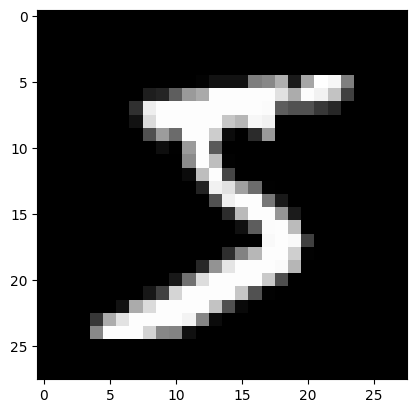

In [174]:
plt.imshow(X[0,0,:,:],cmap='gray')

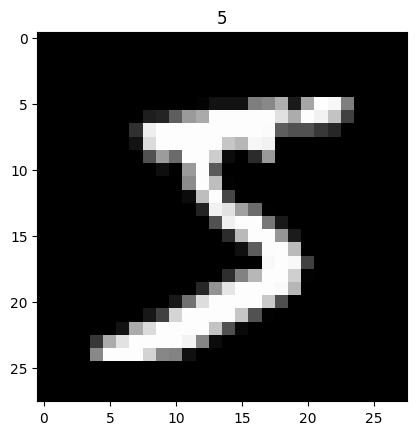

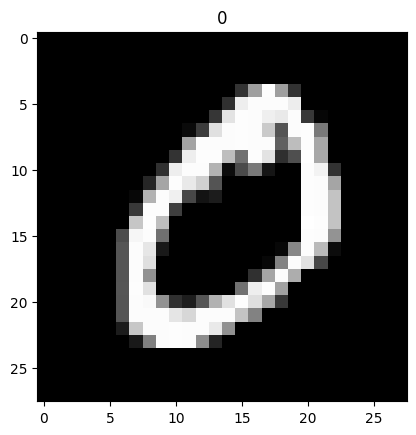

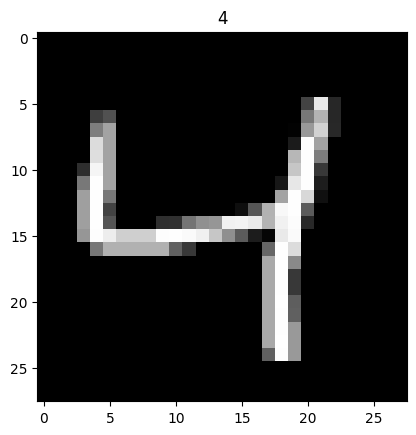

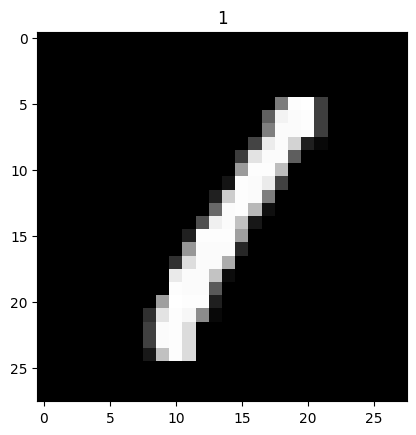

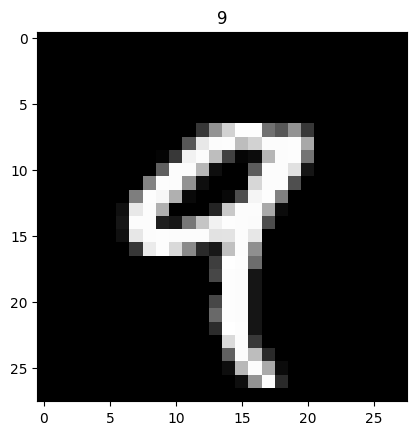

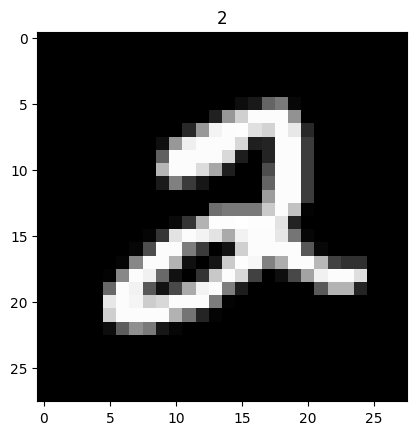

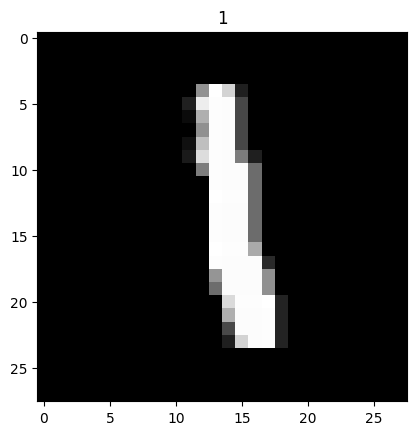

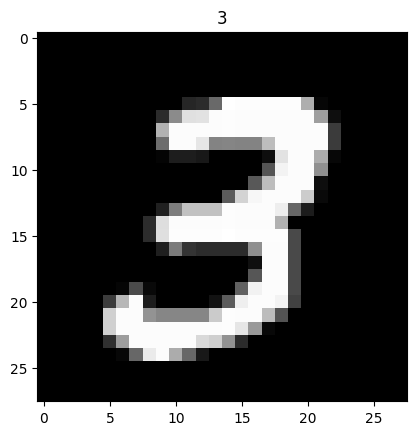

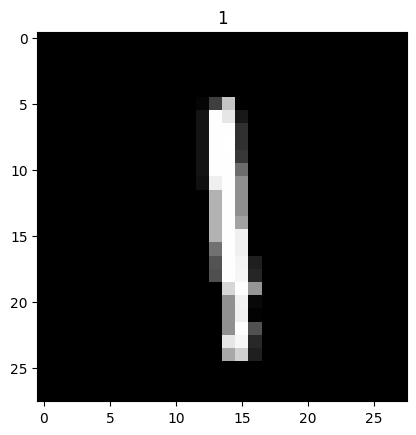

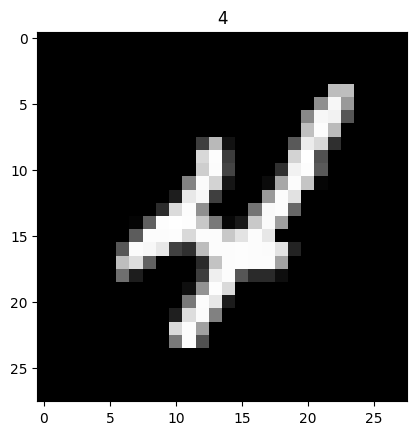

In [175]:

for i in range(10):
    plt.imshow(X[i,0,:,:],cmap='gray')
    plt.title(str(Y[i]))
    plt.show()

In [176]:
Y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
X[0,0,:,:].shape

(28, 28)

In [177]:
x = X[0,0,:,:].flatten()

In [178]:
x.shape

(784,)

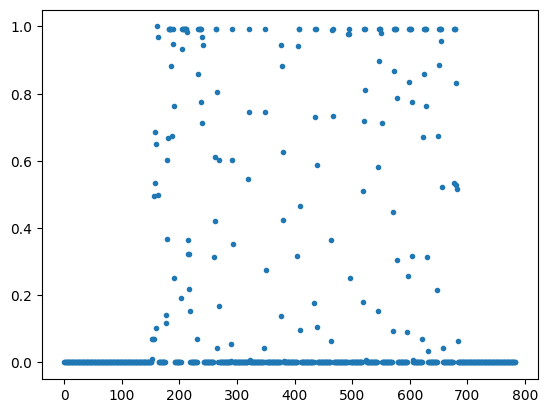

In [179]:
plt.plot(x,'.')

In [180]:
Y[0]

5

In [181]:
x = x[:,None]

In [182]:
x.shape

(784, 1)

np.random.standard_normal((10,784)): This line generates a 10x784 matrix m with random values drawn from a standard normal distribution.


In [183]:
m = np.random.standard_normal((10,784))

In [184]:
m.shape,x.shape

((10, 784), (784, 1))

In [185]:
y = m@x # @ mean matmul

In [ ]:
y = np.matmul(m,x)

In [ ]:
y.shape

(10, 1)

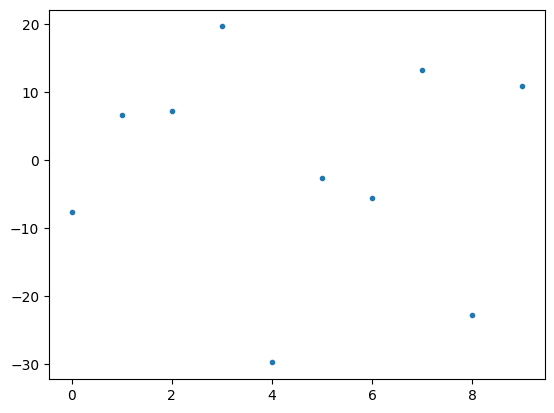

In [ ]:
plt.plot(y,'.')

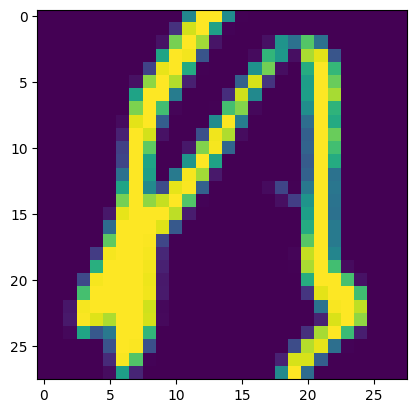

In [ ]:
plt.imshow(x.reshape(28,28))

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X.shape[2]*X.shape[3]

784

In [ ]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [ ]:
X.shape

(60000, 784)

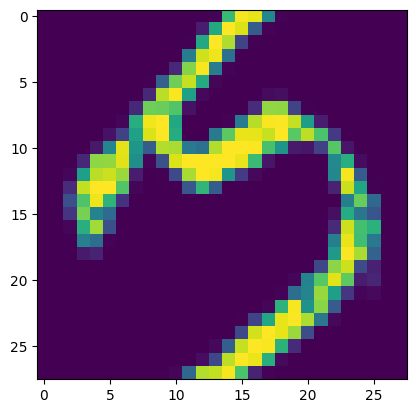

In [ ]:
plt.imshow(X[1000,:].reshape(28,28))

In [ ]:
Y[1000]

3

In [ ]:
x = X[0:2,:]

In [ ]:
x.shape

(2, 784)

In [ ]:
x = x.T

In [ ]:
m.shape,x.shape

((10, 784), (784, 2))

In [ ]:
y = m@x

In [ ]:
y

array([[ -7.64782174,  14.35284883],
       [  6.60929191,   7.86742468],
       [  7.28472205,  17.21911334],
       [ 19.64907079, -13.47532084],
       [-29.72042207,  -8.60534712],
       [ -2.59227268,  -9.96086802],
       [ -5.52894478, -17.8393249 ],
       [ 13.18928013,   9.09499273],
       [-22.75036735, -14.3148249 ],
       [ 10.8377317 , -11.53241476]])

In [ ]:
np.max(y, axis=0)

array([19.64907079, 17.21911334])

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
Y[0:2]

array([8, 7])

In [ ]:
y_ans = Y[0:2]

In [ ]:
y_ans

array([8, 7])

In [ ]:
y

array([3, 2])

In [ ]:
np.sum((y == y_ans))/len(y)

0.0

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
X_test = X_test.T

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y_ans = Y

In [ ]:
acc = np.sum(y == y_ans)/len(Y)

In [ ]:
acc

0.0701

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.08253333333333333


In [ ]:
m_best = 0
acc_best = 0

for i in range(1000):

    m = 0.1*np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

0.09141666666666666
0.11043333333333333
0.1304
0.168
0.17205
0.18636666666666668
0.18826666666666667


In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
# def scale(img):
#     img_min = torch.min(img)
#     img_max = torch.max(img)
#     scaled = (img - img_min) / (img_max - img_min) * 1.0
#     return scaled

In [ ]:
# X = scale(X)
# X_test = scale(X_test)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.15354999899864197
0.17024999856948853
0.17268332839012146
0.18095000088214874
0.19513332843780518
0.2061166763305664
0.20986667275428772
0.21230000257492065
0.22273333370685577
0.2247166633605957
0.23250000178813934
0.23458333313465118
0.23636667430400848
0.23641666769981384
0.23703333735466003
0.23983334004878998
0.2455500066280365
0.2555333375930786
0.25760000944137573
0.26089999079704285
0.26475000381469727
0.2740499973297119
0.27531665563583374
0.2768999934196472
0.27906668186187744
0.2878666818141937
0.29573333263397217
0.2971666753292084
0.30568334460258484
0.31306666135787964
0.3235166668891907
0.32760000228881836
0.33678334951400757
0.3428666591644287
0.3435666561126709
0.3452666699886322
0.3457166850566864
0.35199999809265137
0.35374999046325684
0.3554333448410034
0.35975000262260437
0.3598499894142151
0.36061668395996094
0.3630666732788086
0.3696500062942505
0.372050017118454
0.3722499907016754
0.3755333423614502
0.3811333477497101
0.382916659116745
0.3868499994277954
0.388

In [ ]:
m_random = GPU_data(np.random.randn(10,784))

In [ ]:
m_random.shape

torch.Size([10, 784])

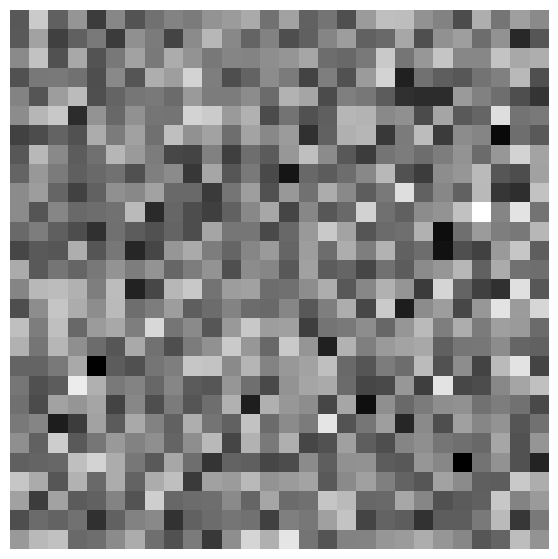

In [ ]:
plot(m_random[0,:].reshape(28,28))

In [ ]:
m_best.shape

torch.Size([10, 784])

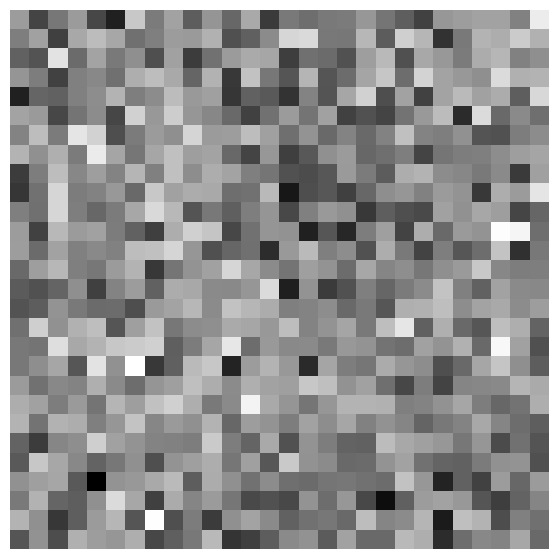

In [ ]:
plot(m_best[0,:].reshape(28,28))

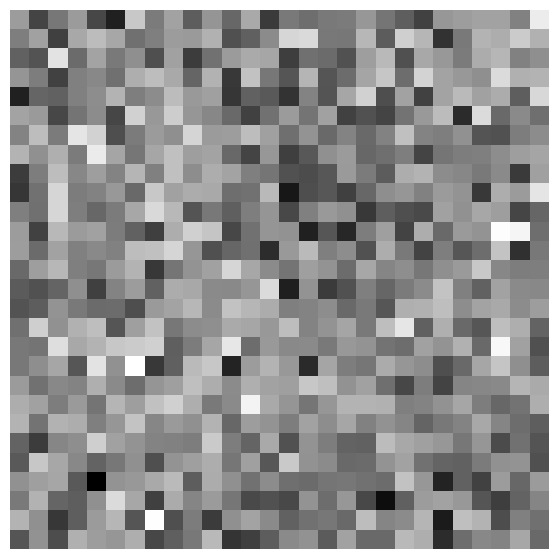

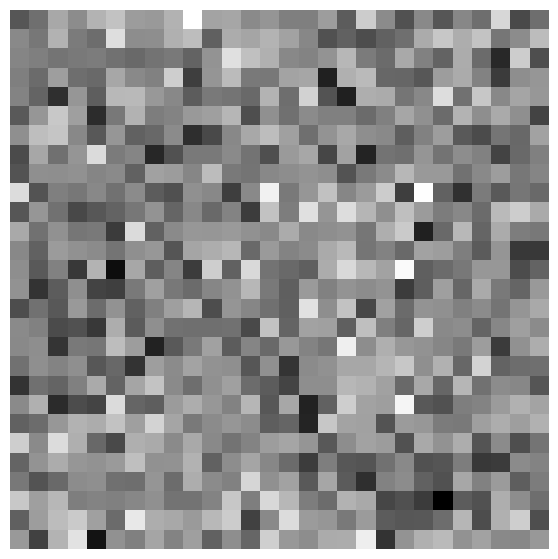

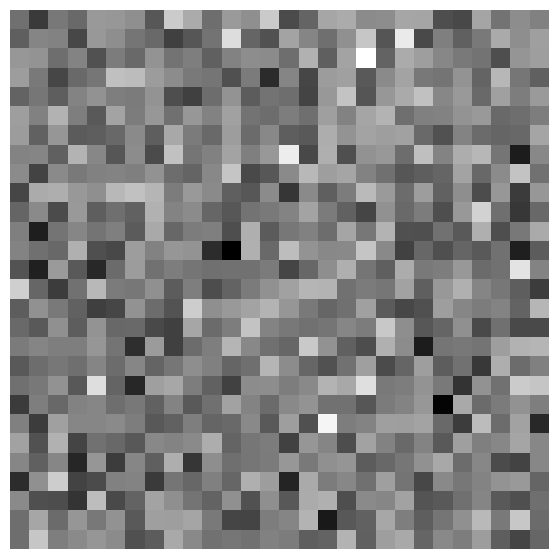

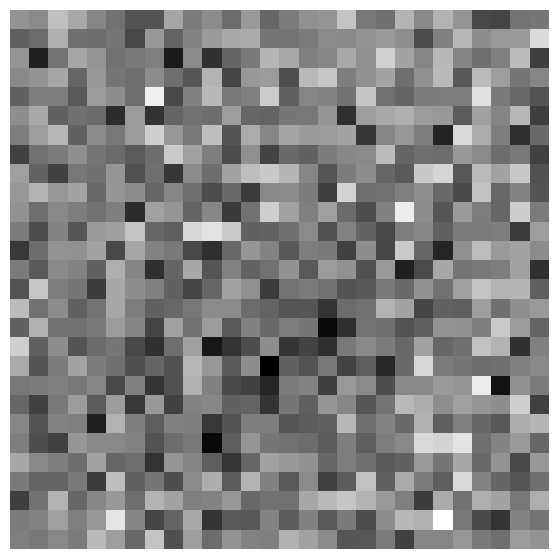

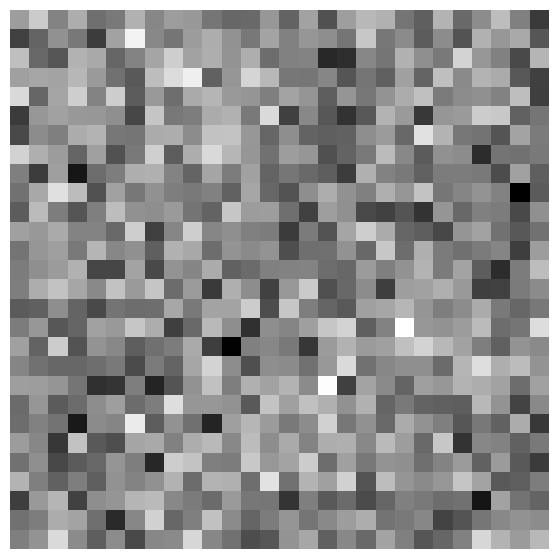

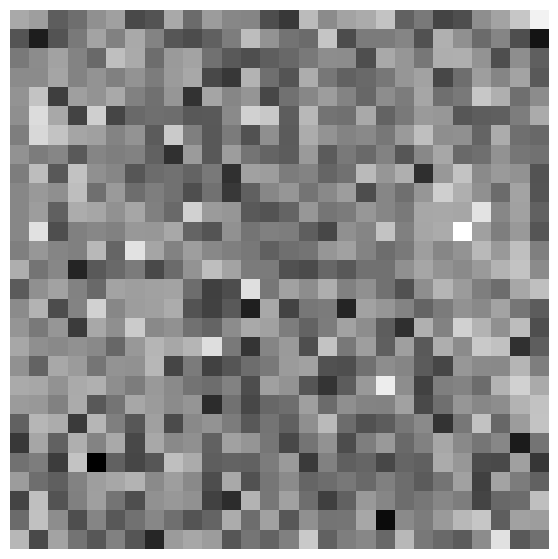

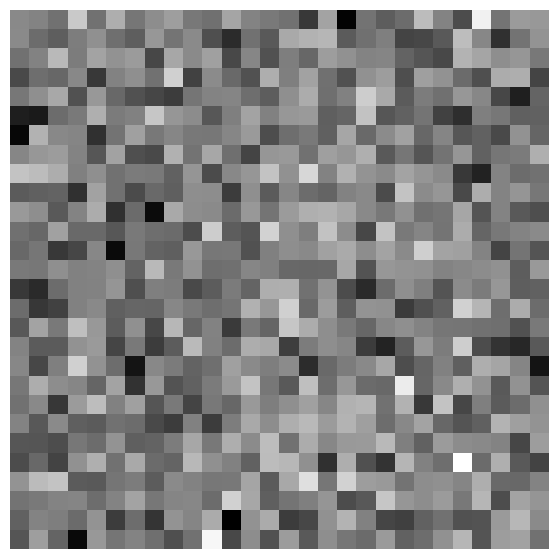

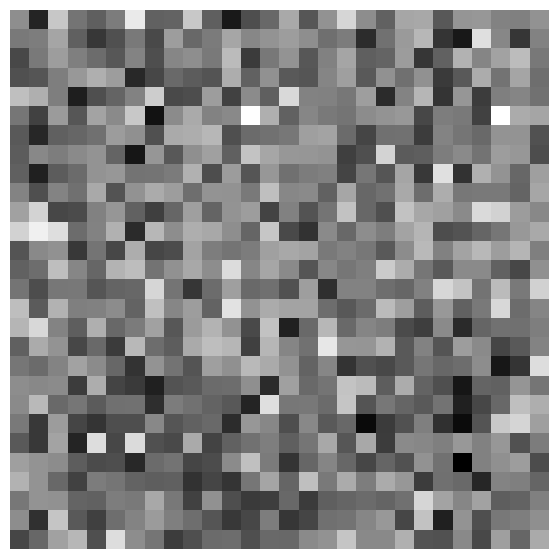

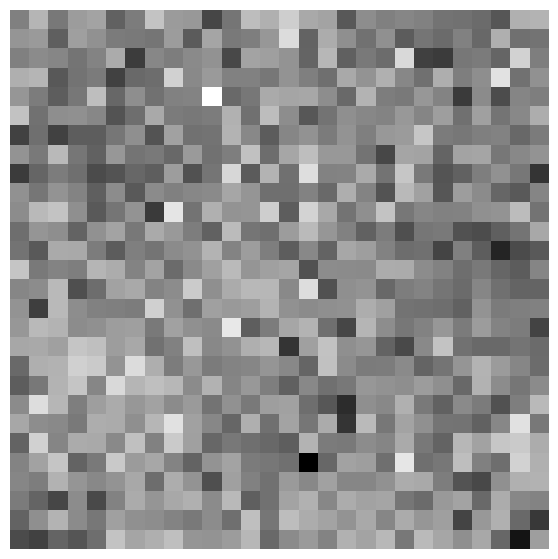

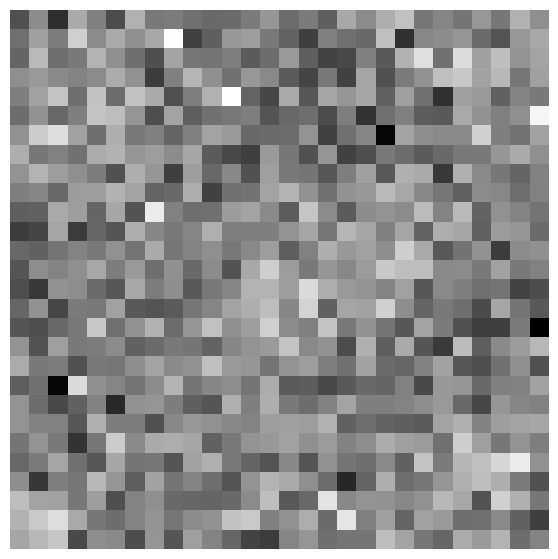

In [ ]:
for i in range(10):
    plot(m_best[i,:].reshape(28,28))

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1)
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

tensor([0.1701, 0.1602, 0.1586, 0.1549, 0.1489, 0.1463, 0.1384, 0.1380, 0.1353,
        0.1340, 0.1311, 0.1296, 0.1285, 0.1262, 0.1256, 0.1253, 0.1236, 0.1232,
        0.1226, 0.1220, 0.1217, 0.1214, 0.1200, 0.1196, 0.1192, 0.1191, 0.1180,
        0.1152, 0.1145, 0.1133, 0.1133, 0.1104, 0.1101, 0.1098, 0.1096, 0.1084,
        0.1072, 0.1072, 0.1064, 0.1049, 0.1048, 0.1030, 0.1028, 0.1012, 0.1002,
        0.0999, 0.0993, 0.0992, 0.0969, 0.0955, 0.0952, 0.0950, 0.0946, 0.0946,
        0.0946, 0.0944, 0.0944, 0.0934, 0.0926, 0.0922, 0.0915, 0.0914, 0.0904,
        0.0903, 0.0901, 0.0883, 0.0879, 0.0879, 0.0875, 0.0872, 0.0867, 0.0865,
        0.0857, 0.0857, 0.0853, 0.0838, 0.0833, 0.0832, 0.0831, 0.0830, 0.0828,
        0.0813, 0.0793, 0.0791, 0.0766, 0.0745, 0.0741, 0.0739, 0.0736, 0.0710,
        0.0690, 0.0686, 0.0681, 0.0651, 0.0649, 0.0632, 0.0603, 0.0550, 0.0544,
        0.0478], device='cuda:0')

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[50:100] = 0
    M[0:50] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

0 0.16920000314712524
32 0.1764499992132187
33 0.20603333413600922
34 0.21406666934490204
35 0.23358333110809326
36 0.24033333361148834
37 0.25201666355133057
38 0.2727166712284088
39 0.2870500087738037
40 0.2906666696071625
41 0.2919166684150696
42 0.29571667313575745
43 0.30168333649635315
44 0.3111666738986969
45 0.322216659784317
46 0.32850000262260437
47 0.3421333432197571
48 0.34751665592193604
49 0.35503333806991577
50 0.3665499985218048
51 0.376716673374176
52 0.37956666946411133
53 0.38081666827201843
54 0.3850666582584381
55 0.39008334279060364
56 0.3956833481788635
57 0.3990333378314972
58 0.4062333405017853
59 0.41251668334007263
60 0.41366666555404663
61 0.41796666383743286
62 0.42035001516342163
63 0.423633337020874
64 0.4265333414077759
65 0.43025001883506775
66 0.4348166584968567
67 0.4389166831970215
68 0.443533331155777
69 0.444516658782959
70 0.44893333315849304
71 0.45098334550857544
72 0.4559166729450226
73 0.45660001039505005
75 0.4585166573524475
76 0.46076667308

In [ ]:
y_test = torch.argmax((M@X_test), axis=1)
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()

In [ ]:
X_test.shape

In [ ]:
acc_test

In [ ]:
y_test[0]

In [ ]:
Y_test

In [ ]:
for i in range(10):

    guess = y_test[0,i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

def plot(x, title=None):
    if type(x) == torch.Tensor:
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

# Convert the matplotlib plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Generate the HTML content
html_content = "<html><body>"

for i in range(10):

    guess = y_test[0, i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)
    img_b64 = plot_to_base64()


    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'


html_content += "</body></html>"


# Write the HTML content to a file
print(html_content, file=open("output.html",'w'))

In [ ]:
import IPython
IPython.display.HTML(filename='output.html')